# PyTorch Tensors

First we will import pytorch.

In [1]:
import torch

Let's see a few basic tensor manipulations. First, just a few of the ways to create tensors:

In [2]:
z = torch.zeros(5,3)
print (z)
print (z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


Above, we created a 5x3 matrix filled with zeros, and query its datatype to find out that the zeros are 32-bit floating point numbers, which is the default in PyTorch.

What if we wanted integers instead? We can always override the default:

In [3]:
i = torch.ones((5, 3), dtype=torch.int16)
print (i)
# If not default, print also shows dtype

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


You can see that when we do change the default, the tensor helpfully reports this when printed.

It's common to initialize learning weights randomly, often with a specific seed for the PRNG for reproducibility of results:

In [4]:
torch.manual_seed(1729)
r1 = torch.rand(2,2)
print ('A random tensor:')
print (r1)

r2 = torch.rand(2,2)
print ('Another random tensor:')
print (r2)

torch.manual_seed(1729)
r3 = torch.rand(2,2)
print ('Random tensor with seed set to same as r1:')
print (r3)

A random tensor:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])
Another random tensor:
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])
Random tensor with seed set to same as r1:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


PyTorch tensors perform arithmetric operations intuitively . Tensors of similar shapes may be added, multiplied, etc. Operations with scalars are distributed over the tensor:

In [5]:
ones = torch.ones(2, 3)
print (ones)

twos = torch.ones(2, 3)*2
print (twos)

threes = ones + twos
print (threes)
print (threes.shape)

r1 = torch.rand(2, 3)
r2 = torch.rand(3, 2)
r3 = torch.matmul(r1,r2)
print (r3)
print (r3.shape)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])
tensor([[0.2269, 0.3783],
        [0.3445, 0.7730]])
torch.Size([2, 2])


Here is a small sample of mathematical operations available:

In [6]:
r = (torch.rand(2,2) - 0.5)*2
print ("A random matrix, r:")
print (r)

print ("\nThe bsolute value of r:")
print (torch.abs(r))

print ("\nInverse sin of r:")
print (torch.asin(r))

print ("\nDeterminant of r:")
print (torch.det(r))

print ("\nSingle value decomposition of r:")
print (torch.svd(r))

print ("\nAverage and standard deviation of r:")
print (torch.std_mean(r))

print ("\nMaximum value of r:")
print (torch.max(r))

A random matrix, r:
tensor([[ 0.9956, -0.2232],
        [ 0.3858, -0.6593]])

The bsolute value of r:
tensor([[0.9956, 0.2232],
        [0.3858, 0.6593]])

Inverse sin of r:
tensor([[ 1.4775, -0.2251],
        [ 0.3961, -0.7199]])

Determinant of r:
tensor(-0.5703)

Single value decomposition of r:
torch.return_types.svd(
U=tensor([[-0.8353, -0.5497],
        [-0.5497,  0.8353]]),
S=tensor([1.1793, 0.4836]),
V=tensor([[-0.8851, -0.4654],
        [ 0.4654, -0.8851]]))

Average and standard deviation of r:
(tensor(0.7217), tensor(0.1247))

Maximum value of r:
tensor(0.9956)


There is a good deal more to know about the power of PyTorch tensors, including how to set them up for parallel computations on GPU - we'll be going into more depth in other chapters.

# PyTorch Models
Lets talk about how we express models in PyTorch.

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

One of the earliest convolutional neural nets is the LeNet-5 model. (A diagram is available [here](https://pytorch.org/tutorials/beginner/introyt/introyt1_tutorial.html)). It was built to read small images of handwritten numbers, and correctly classify the digit of the number it was.

An abridged version of how it works:
- Layer C1 is a convolutional layer, by running segments of the complete picture through feature filters. The activation maps are downsampled into Layer S2.
- Layer S2 is passed through another convolutional layer C3, that further extracts features of features from the downsampled activation map.
- A laymen's explanation would be each layer gives a more complex explanation to relationships between identified parts of the image as a whole, and the last few fully connected layers decide the classification output of the initial input image.

How do we express this network in code?

In [8]:
class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 6 * 6, 120) # 6 * 6 from input image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:] # all dims except batch dim
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

Looking at the code, we should be able to spot some structural similarities with the diagram mentioned above.

This demonstrates the structure of a typical PyTorch model:
- It inherits from `torch.nn.Module` - modules may be nested - in fact, even the `Conv2d` and `Linear`layer classes inherit from `torch.nn.Module`.
- A model will have an `__init__()` function, where it instantiates its layers, and loads any data artifacts it might need (e.g. an NLP model might load a vocabulary).
- A model will have a `forward()` function. This is where the actual computation happens: An input is passed through the various network layers and functions to generate the output.
- Other than that, we can build our model class like any Python class, adding whatever properties and methods we need to support the model's computation.

Let's instantiate this object and run a sample input through it.

In [9]:
net = LeNet()
print (net)

input  = torch.randn(1, 1, 32, 32)
print ("\nImage batch shape:")
print (input.shape)

output = net(input)
print ("\nRaw output:")
print (output)
print (output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Image batch shape:
torch.Size([1, 1, 32, 32])

Raw output:
tensor([[ 0.0372, -0.0170, -0.0243, -0.0084, -0.0150, -0.0408, -0.1253,  0.0647,
          0.0078,  0.0023]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


There are a few important things happening above:

First, we instantiate the `LeNet` class, and we print the `net` object. A subclass of `torch.nn.Module` will report the layers it has created and their shape and parameters. This can provide a handy overview of a model if we want to get the gist of the processing.

Below that, we created one dummy input of a 32x32 grayscale image, (one dummy image (1) X grayscale (1) X size (32 X 32)). With a normal image file, we would load the image, then use `torchvision.transforms` to convert them to a tensor.

The 4 dimensions of our dummy data represents the batch, channels, and input dimensions. For a batch of 16 images, the input shape would look like: 16 x 1 x 32 x 32. Then a batch of 16 coloured images would look like: 16 X 3 X 32 X 32.

We ask the model for an inference by calling it like a function: `net(input)`. From the `forward()` method, the input is fed through the network layers. An output is produced and, in the case of training, the deltas of all parameters are backpropagated through the network for learning. Looking at the shape of the `output`, we can see that it also has a batch dimension along with the actual output dimension. This batch dimension should always match the input batch dimension.

# Datasets and DataLoaders

Here, we demonstrate using ready-to-download, open-access datasets from `TorchVision`, how to transform input data for consumption by the model, and use `DataLoader` to feed batches of data to the model.

The first thing we need to do is to obtain the data. The data downloaded from TorchVision and other open-access datasets are generally considered toy datasets, mainly used for prototyping models and benchmarking performance. Real world data often require much more processing to be usable.

Next, we transform our imcoming images into a PyTorch tensor.

In [10]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))]
)

We specify two transformations for the later inputs:
- `transforms.ToTensor()` converts the pixel values loaded by Pillow into PyTorch tensors.
- `transforms.Normalize()` adjusts the values of the tensors so that the average is zero and the standard deviation is 0.5. Most activation functions have their strongest gradients around x = 0, so centering our data there can speed up learning.

There are many more `transforms` available. A more detailed documentation can be found [here](https://pytorch.org/vision/stable/transforms.html).

Next, we will create an instance of the CIFAR10 dataset. This is a set of 32x32 coloured image tiles representing 10 classes of objects: 6 of animals (bird, cat, deer, dog, frog, horse) and 4 of vehicles (airplane, automobile, ship, truck):

In [11]:
trainset = torchvision.datasets.CIFAR10(root = '../data',
                                        train=True,
                                        download=True,
                                        transform=transform,
                                       )

Files already downloaded and verified


This is an example of loading a dataset object in PyTorch. Downloadable datasets (like CIFAR10 above) are subclasses of `torch.utils.data.Datasets`. `Dataset` classes in PyTorch include the downloadable datasets in TorchVision, TorchText, and TorchAudio, as well as utility dataset classes such as `torchvision.datasets.ImageFolder`, which will read a folder of labeled images. With this, we can create custom `Dataset` subclasses.

When we instantiate our datasets, we need to declare a few things:
- The filesystem path to where we want the data to go, or where to find an already downloaded copy.
- Whether or not we are using this dataset for training; most datasets will be split into training and test subsets.
- Whether we would like to download the dataset if it isn't in the filesystem path.
- The transformations to apply.

Once the dataset is ready, we then pass it through the `DataLoader`:

In [12]:
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size = 4,
                                          shuffle = True,
                                          num_workers=2,
                                         )

A `Dataset` subclass wraps access to the data, and is specialized to the type of data it's serving. The `DataLoader` knows _nothing_ about the data, but organizes the input tensors served by the `Dataset` into batches with the parameters specified.

In the example above, we've asked a `DataLoader` to give us batches of 4 images from `trainset`, randomizing their order with `shuffle=True`, and to spin up two workers to load the data from disk.

It's good practice to visualize the batches your `DataLoader` serves:

 ship truck   cat  bird


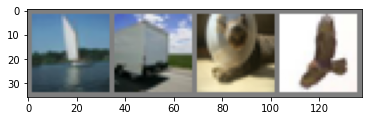

In [13]:
import matplotlib.pyplot as plt
import numpy as np

classes  = ('plane', 'car', 'bird', 'cat', 'deer',
            'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img/2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# Get some random training samples
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print (' '.join('%5s'%classes[labels[j]] for j in range(4)))

Running the above cell gives us 4 images, and the corresponding labels.

# Training the PyTorch Model

Let's put all the pieces together and train a model:

In [14]:
# We start with the imports

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

First, we'll need the data as training and test sets. Whether or not the data is already on our drive, running the following code will download it (or verify the download if it's already available).

In [15]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)

trainset = torchvision.datasets.CIFAR10(root='../data',
                                       train=True,
                                       download=True,
                                       transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                         batch_size = 4,
                                         shuffle=True,
                                         num_workers = 2)

testset = torchvision.datasets.CIFAR10(root='../data',
                                       train=False,
                                       download=True,
                                       transform=transform)
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size = 4,
                                         shuffle=True,
                                         num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
            'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Next, as stated previously, we run a sanity check on the outputs of `DataLoader`:

 bird,plane,horse,  car


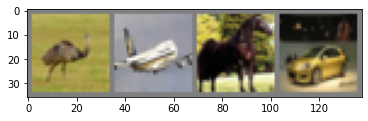

In [16]:
def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print (','.join('%5s'%classes[labels[j]] for j in range(4)))

After the datasets, we define and instantiate the model. Instead of the modified `LeNet` version from the tutorial, I define my own ConvNet for this task:

In [17]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.conv2 = nn.Conv2d(16, 64, 5)
        self.pool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(64*5*5, 120)
        self.fc2 = nn.Linear(120, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

net = CNN()

We also need to declare the optimizers and loss functions for the model:

In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum=0.9)

The loss function, as discussed in an earlier document, measures how far from the ideal is the model's prediction. Cross entropy loss is a typical loss function to measure multi-class tasks.

The __optimizer__ is what drives learning. Here we create an optimizer that implements _stochastic gradient descent_, one of the more straightforward optimization algorithms. Besides parameters of the algorithm, like learning rate (`lr`) and momentum, we also pass in the network parameters (`net.parameters`), which are stored in the tensors for each layer.

Finally, we assemble everything into training and testing loops:

In [19]:
EPOCHS = 2

for epoch in range(EPOCHS):
    running_loss = 0
    for i, data in enumerate(trainloader,0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print ('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + i, running_loss/2000))
            running_loss = 0

print ("Finished training.")

[1,  3998] loss: 2.106
[1,  7998] loss: 1.757
[1, 11998] loss: 1.570
[1, 15998] loss: 1.468
[1, 19998] loss: 1.396
[1, 23998] loss: 1.323
[2,  3998] loss: 1.220
[2,  7998] loss: 1.172
[2, 11998] loss: 1.146
[2, 15998] loss: 1.120
[2, 19998] loss: 1.093
[2, 23998] loss: 1.061
Finished training.


Here we did 2 training epochs; two passes over the training set. Each pass has an inner loop that iterates over the training data, serving batches of 4 of transformed images and their correct labels to the model.

PyTorch stores the gradients in each batch and accumulates them by default. It is important to zero the gradients with `optimizer.zero_grad()`. We then ask the model for a prediction `output` and compare it with the labels. The loss is quantified with SGD, and backpropagated with `loss.backward()`.

Note:
Loss is monotonically descending, indicating that our model is indeed imrpving its performance on the dataset.

As a final step, we should check that the model is actually _learning_, and not simply "memorising" the dataset (overfitting). Overfitting usually occurs when the dataset is too small, of if the model has gone through too many passes on the same dataset. To test the generality of the model, we test it on a separate training set that the model was not trained on:

In [21]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print (f"Accuracy on {total} samples: {(100*correct/total):.2f}%")

Accuracy on 10000 samples: 63.33%


A random choice output would give an accuracy of 10%. Our model provided better predictions than randomly selecting labels for given images.